# Creating Basic CNN Architecture using Tensorflow 


We will start with some basic image processing using CNN

In [ ]:
from sklearn.datasets import load_sample_image 
import numpy as np
import pandas as pd
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


This library loads the numpy array of a single sample image. 
<br> 2 images are available - china.jpg, flower.jpg

<br> We will load these images and normalize them.

In [ ]:
# Load sample images
china = load_sample_image("china.jpg") 
flower = load_sample_image("flower.jpg") 

In [ ]:
print(china.shape)
print (flower.shape)

(427, 640, 3)
(427, 640, 3)


This implies that the image has W X H X C , height = 427, width = 640, Channels = 3 <br> Now, let us see the content of these images. 

*   List item
*   List item



In [ ]:
print(china)

[[[174 201 231]
  [174 201 231]
  [174 201 231]
  ...
  [250 251 255]
  [250 251 255]
  [250 251 255]]

 [[172 199 229]
  [173 200 230]
  [173 200 230]
  ...
  [251 252 255]
  [251 252 255]
  [251 252 255]]

 [[174 201 231]
  [174 201 231]
  [174 201 231]
  ...
  [252 253 255]
  [252 253 255]
  [252 253 255]]

 ...

 [[ 88  80   7]
  [147 138  69]
  [122 116  38]
  ...
  [ 39  42  33]
  [  8  14   2]
  [  6  12   0]]

 [[122 112  41]
  [129 120  53]
  [118 112  36]
  ...
  [  9  12   3]
  [  9  15   3]
  [ 16  24   9]]

 [[116 103  35]
  [104  93  31]
  [108 102  28]
  ...
  [ 43  49  39]
  [ 13  21   6]
  [ 15  24   7]]]


We see that each of the three color channels has a  pixel intensity 
is represented as a byte from 0 to 255. Let us normalize this before processing.
We can either use sklearn.preprocessing.normalize() or simply divide by 255. <br> We do this for both images.

In [ ]:
china = china/255
flower = flower/255

In [ ]:
print(china)

[[[0.68235294 0.78823529 0.90588235]
  [0.68235294 0.78823529 0.90588235]
  [0.68235294 0.78823529 0.90588235]
  ...
  [0.98039216 0.98431373 1.        ]
  [0.98039216 0.98431373 1.        ]
  [0.98039216 0.98431373 1.        ]]

 [[0.6745098  0.78039216 0.89803922]
  [0.67843137 0.78431373 0.90196078]
  [0.67843137 0.78431373 0.90196078]
  ...
  [0.98431373 0.98823529 1.        ]
  [0.98431373 0.98823529 1.        ]
  [0.98431373 0.98823529 1.        ]]

 [[0.68235294 0.78823529 0.90588235]
  [0.68235294 0.78823529 0.90588235]
  [0.68235294 0.78823529 0.90588235]
  ...
  [0.98823529 0.99215686 1.        ]
  [0.98823529 0.99215686 1.        ]
  [0.98823529 0.99215686 1.        ]]

 ...

 [[0.34509804 0.31372549 0.02745098]
  [0.57647059 0.54117647 0.27058824]
  [0.47843137 0.45490196 0.14901961]
  ...
  [0.15294118 0.16470588 0.12941176]
  [0.03137255 0.05490196 0.00784314]
  [0.02352941 0.04705882 0.        ]]

 [[0.47843137 0.43921569 0.16078431]
  [0.50588235 0.47058824 0.20784314]


In [ ]:
images = np.array([china, flower])

We will now process this mini-batch of two images

In [ ]:
images.shape

(2, 427, 640, 3)

Observe that the images array is nothing but a batch of 2 images of dimension 427X640X3  <br> Also notice that it is a 4D Tensor (B X H X W X C)

In [ ]:
batch_size, height, width, channels = images.shape

In [ ]:
print ("batch_size = {}, height = {}, width = {}, channels = {}".format(batch_size,height,width,channels))

batch_size = 2, height = 427, width = 640, channels = 3


In [ ]:
# Visualize the observation's feature values as an image
def showimage(i):
    #We first set the colomap to grayscale
    plt.inferno() 
    plt.figure(figsize = [1,1])

    #Choose the observation/tuple to be displayed.
    plt.matshow(images[i]) 

    #Show the plot
    plt.show()

<Figure size 432x288 with 0 Axes>

<Figure size 72x72 with 0 Axes>

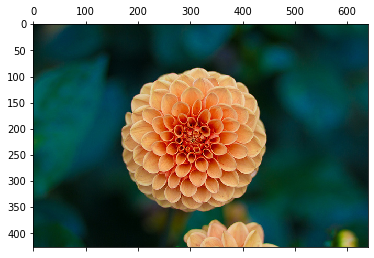

In [ ]:
showimage(1)

<Figure size 432x288 with 0 Axes>

<Figure size 72x72 with 0 Axes>

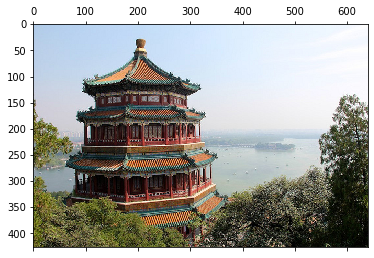

In [ ]:
showimage(0)

We create 2 filters

In [ ]:
# Create 2 filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)

Note that filters is also a 4D Tensor (Height X Width X Channels X NumFilters)
<br> 

In [ ]:
filters[:, 3, :, 0] = 1 # vertical line
filters[3, :, :, 1] = 1 # horizontal line

In [ ]:
print(filters.shape)

(7, 7, 3, 2)


In [ ]:
print(filters)

[[[[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[1. 0.]
   [1. 0.]
   [1. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]]


 [[[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[1. 0.]
   [1. 0.]
   [1. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]]


 [[[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[1. 0.]
   [1. 0.]
   [1. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]]


 [[[0. 1.]
   [0. 1.]
   [0. 1.]]

  [[0. 1.]
   [0. 1.]
   [0. 1.]]

  [[0. 1.]
   [0. 1.]
   [0. 1.]]

  [[1. 1.]
   [1. 1.]
   [1. 1.]]

  [[0. 1.]
   [0. 1.]
   [0. 1.]]

  [[0. 1.]
   [0. 1.]
   [0. 1.]]

  [[0. 1.]
   [0. 1.]
   [0. 1.]]]


 [[[0. 0.]
 

In [ ]:
def showfilter(i):
    #We first set the colomap to grayscale
    plt.gray() 
    plt.figure(figsize = [1,1])

    #Choose the observation/tuple to be displayed.
    plt.matshow(filters[:, :, 2, i])  # vertical line

    #Show the plot
    plt.show()

<Figure size 432x288 with 0 Axes>

<Figure size 72x72 with 0 Axes>

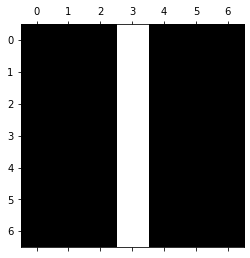

In [ ]:
showfilter(0)


<Figure size 432x288 with 0 Axes>

<Figure size 72x72 with 0 Axes>

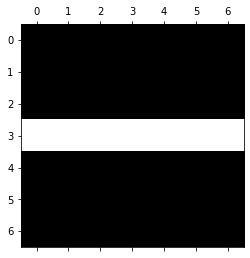

In [ ]:
showfilter(1)

ABove, we see the visualizations of the filters we are going to use over the image <br>
We will now add a convolution layer to our network, using Conv2D class profived by tensorflow-keras library<br>
You may go through the documentation here:
https://www.tensorflow.org/api_docs/python/tf/nn/*conv2d*

In [ ]:
outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")


In [ ]:
outputs.shape

TensorShape([2, 427, 640, 2])

We see that the output is a 4D Tensor with dimensions as <br>
Batch_Size X Height X Width X Num_Filters

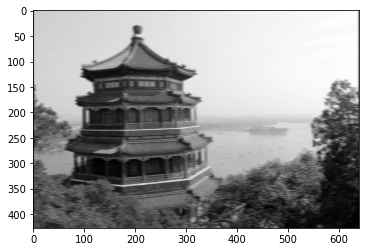

In [ ]:
plt.imshow(outputs[0, :, :, 1], cmap="gray") # plot 1st image's 2nd feature map
plt.show()

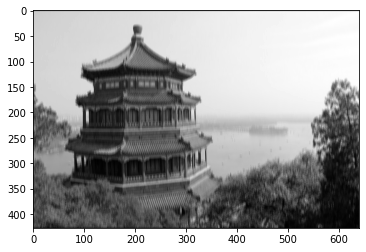

In [ ]:
plt.imshow(outputs[0, :, :, 0], cmap="gray") # plot 1st image's 1st feature map
plt.show()

The above code purely demonstrated the convolution process using conv2d() function. <br> This does not take care of the bias, activation, etc. which has to be separately managed.
<br> So we will now move on to Conv2D which is a high level wrapper which has these functions inbuild with an easy to use interface